### 首先运行下基本的命令，检查下Tensorflow环境是否搭建成功

In [1]:
import tensorflow as tf

hello = tf.constant('Hello Tensorflow!')
with tf.Session() as sess:
    print(sess.run(hello))

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


b'Hello Tensorflow!'


### 模型初试

- 根据Capstone中给出例子[deep learning models for keras](https://github.com/fchollet/deep-learning-models)看了下其他人是如何使用Keras来预测的
- 选择VGG19,InceptionV3,Xception以及ResNet来根据上方的例子做一个简单的预测;
- 自定义一个函数根据不同的module name来预测，并输出图片及排名第一的概率；
- 测试图片我们选取训练集中的中的cat.1.jpg这张图片，这是一张虎斑猫的图片，英文为tabby

In [2]:
from keras.models import *
from keras.layers import *
from keras.applications import *
from keras.preprocessing.image import *
import h5py
import numpy as np
import cv2
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline 

def preditcByModuleName(module_name, image_path):
    model = None
    preprocess = imagenet_utils.preprocess_input # default  preprocess
    input_shape = (224, 224) # default shape
    x_coordinate = 220
    # 根据module name选择构建的模型及input shape和preprocessor
    if(module_name == 'vgg19'):
        model = VGG19(weights='imagenet')
    elif(module_name == 'resnet'):
        model = ResNet50(weights='imagenet')
    elif(module_name == 'xception'):
        model = Xception(weights='imagenet')
        input_shape = (299, 299)
        preprocess = xception.preprocess_input
        x_coordinate = 190
    elif(module_name == 'inception'):
        model = InceptionV3(weights='imagenet')
        input_shape = (299, 299)
        preprocess = inception_v3.preprocess_input
        x_coordinate = 190
    else:
        raise ValueError("Module name is not correct!")
    
    # 加载图片并对数据进行预处理    
    img = load_img(image_path, target_size=(224, 224))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess(x)
    # 预测图片
    preds = model.predict(x)
    P = imagenet_utils.decode_predictions(preds)
    print(P)
    # 合成图片和预测结果并输出
    orig = cv2.imread(image_path)
    (imagenetID, label, prob) = P[0][0]
    cv2.putText(orig, "{}".format(module_name),(x_coordinate, 270), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
    cv2.putText(orig, "Label: {}, {:.2f}%".format(label, prob * 100),(10, 30), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
    cv_rgb = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
    plt.imshow(cv_rgb)
    plt.show()

Using TensorFlow backend.


[[('n02123045', 'tabby', 0.44532597), ('n02123159', 'tiger_cat', 0.3137263), ('n02124075', 'Egyptian_cat', 0.13570851), ('n02127052', 'lynx', 0.006490094), ('n02971356', 'carton', 0.0033812346)]]


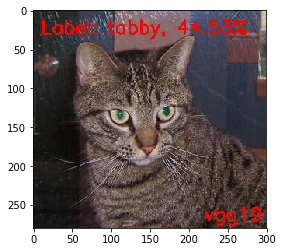

In [3]:
# Test vgg19
img_path = 'data/train/cat/cat.1.jpg'
preditcByModuleName('vgg19', img_path)

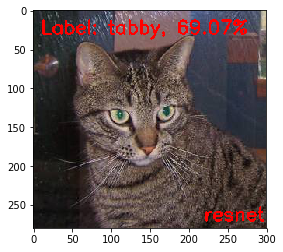

In [9]:
# Test ResNet
preditcByModuleName('resnet', img_path)

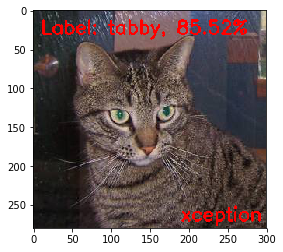

In [10]:
# Test xception
preditcByModuleName('xception', img_path)

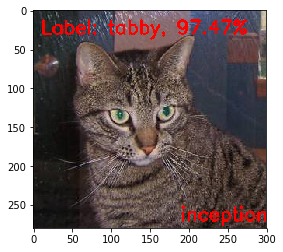

In [11]:
# Test Inception
preditcByModuleName('inception', img_path)

- 第一轮比拼结束，vgg19垫底，inception拔得头筹！下面我们再试一张狗狗的图片
- 测试图片选取训练集中的dog.26.jpg，从文字中可以看出是澳洲牧羊犬，英文为cattle

[[('n02091244', 'Ibizan_hound', 0.24142145), ('n02105412', 'kelpie', 0.22413577), ('n02105162', 'malinois', 0.11064881), ('n02115641', 'dingo', 0.09932012), ('n02090379', 'redbone', 0.048726052)]]


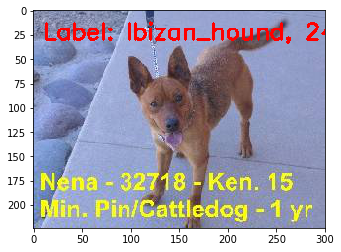

In [4]:
img_path = 'data/train/dog/dog.26.jpg'
preditcByModuleName('vgg19', img_path)

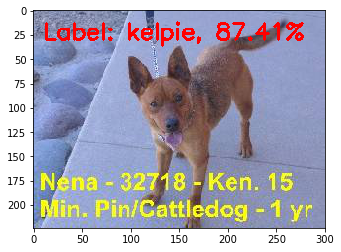

In [18]:
# Test ResNet
preditcByModuleName('resnet', img_path)

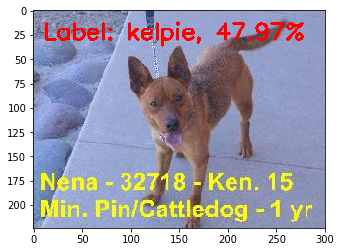

In [19]:
# Test xception
preditcByModuleName('xception', img_path)

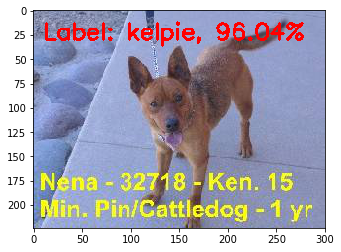

In [20]:
# Test Inception
preditcByModuleName('inception', img_path)

- 第二轮比拼结束，所有预测全部错误，vgg19错的比较远
- 其他预测kelpie的为澳大利亚卡尔比犬，我看了下图片二者确实比较相似，主要区别是身上的斑纹
- 至此简单尝试下模型预测已经完成
- 尝试的主要目的有验证下本地环境是否基本OK
- 粗略的了解下各个模型的表现，有个第一眼的印象
- 因为VGG19年代相对其他模型比较久远，表现相对较差，我们战略性的放弃这个模型。